# Image Denoising Notebook
**Author**: Shozen Dan

In [11]:
using AutocorrelationShell, Wavelets, LinearAlgebra, Images, FileIO, Random, Plots

In [19]:
# Load test image
img = load("images/boat.png")
img = Float64.(Gray.(img)); # convert to grey scale

In [7]:
noisy = make_noisy(img, MersenneTwister(123), 0.7);

In [9]:
Q = qfilter(wavelet(WT.db2));
P = pfilter(wavelet(WT.db2));

# Decompose
noisy_decomp = acwt2D(noisy; L_row=4, L_col=4, P=P, Q=Q);

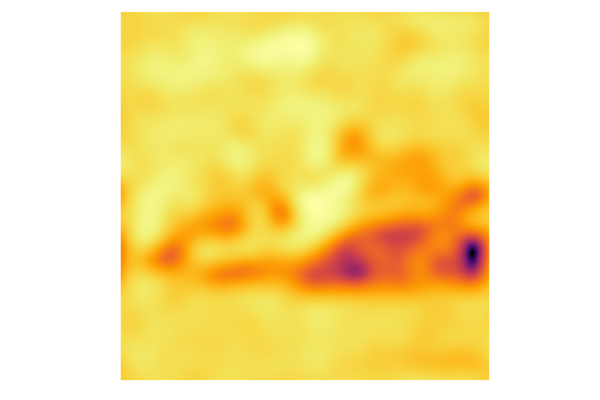

In [18]:
acwt_heatmap(noisy_decomp[:,:,1,1])

In [22]:
# Thresholding
coef_ratio, snr_list = get_snr(img, noisy_decomp, "soft", 0.2)

MethodError: MethodError: no method matching get_snr(::Array{Float64,2}, ::Array{Float64,4}, ::String, ::Float64)
Closest candidates are:
  get_snr(::AbstractArray{T,N} where N, ::AbstractArray{T,N} where N; type, step) where T<:Number at /Users/shozendan/Documents/autocorrelation-shell/src/ACWUtil.jl:78